In [77]:
#Lib's imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math 
from scipy import stats

sns.set(style="whitegrid", font_scale=1.2)

df = pd.read_csv('TJS_final_v3.csv', encoding='utf8') #Import of the data
#Data imported from Kaggle : https://www.kaggle.com/datasets/brendanstyle/tommy-john-surgery-data/data


/var/folders/c6/mjv_3yhn2yq8cd7vd4x458kw0000gn/T/ipykernel_14193/4117333325.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set(title = "Cases of TJ Surgery in studied pitchers", xticklabels=["No TJS", "TJS"], xticks=[0, 1]) #Setting title, labels, ticks


<Axes: title={'center': 'Cases of TJ Surgery in studied pitchers'}, xlabel='TJS', ylabel='Count'>

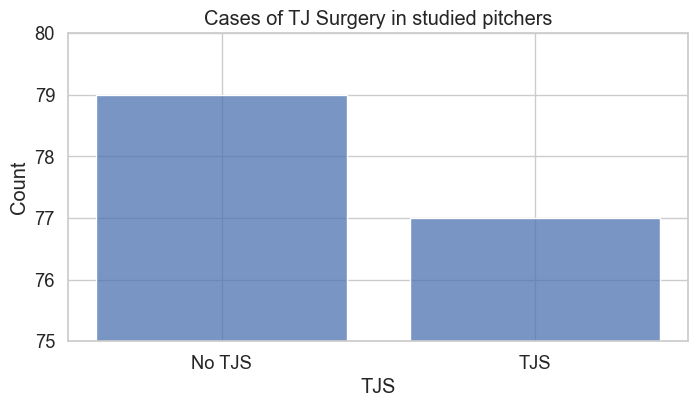

In [78]:
#Graph representing how many pitchers in this data set had a TJS

plt.figure(figsize = (8, 4) ) #figure
ax = plt.axes()  #axes
ax.set(title = "Cases of TJ Surgery in studied pitchers", xticklabels=["No TJS", "TJS"], xticks=[0, 1]) #Setting title, labels, ticks
ax.set_ylim(75, 80) #adjust y_lim
sns.histplot(df["TJS"], discrete=True , shrink=.8) #plotting

<Axes: title={'center': 'TJS cases based on Fastball velo and frequence'}, xlabel='Fastball Velocity [mph]', ylabel='Fastball percentage'>

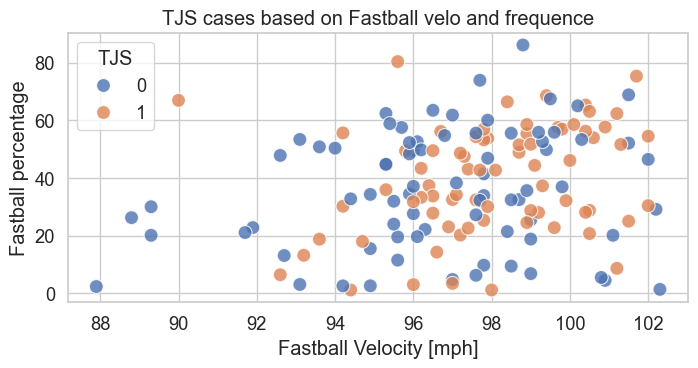

In [79]:
#In baseball there is a myth: Who throws harder is more likely exposed to arm
#injuries, with this graph we want to see if this is actually true

#Graph representing Fastball speed in relation with how many times is thrown 
# and hue assumes TJS value


plt.figure(figsize = (8, 3.5) )  #figure
plt.title("TJS cases based on Fastball velo and frequence") #setting title
#setting labels
plt.xlabel("Fastball Velocity [mph]")
plt.ylabel("Fastball percentage")


sns.scatterplot(data=df, x="FF_max_velo", y="FF_percentage", hue="TJS", s = 100, alpha=.8) #plotting


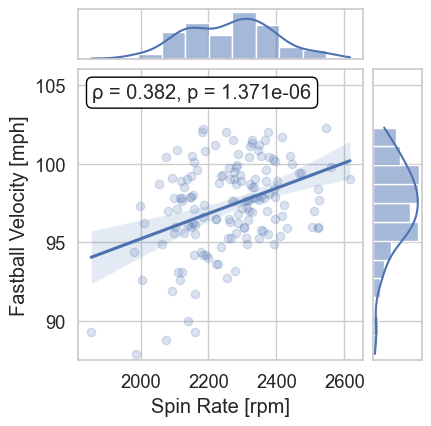

In [80]:

# Another myth: Is fastball speed directly dependent of the spin applied to the ball



m = df["FF_release_spin_rate"].notnull() #mask to avoid Nan
masked_df = df[['FF_release_spin_rate', 'FF_max_velo']][m] #applicate mask

g = sns.jointplot(masked_df, x = "FF_release_spin_rate", y = "FF_max_velo", kind='reg', height = 4.5, ratio = 5,
              joint_kws = {'scatter_kws':dict(alpha=0.2)})   #Plotting

g.set_axis_labels("Spin Rate [rpm]", "Fastball Velocity [mph]")   #setting labels
g.ax_joint.set_ylim(87.5, 106)  #adjust y_lim


r, p = stats.pearsonr( masked_df['FF_release_spin_rate'], masked_df['FF_max_velo'])  #Calculate pearson of the data
g.ax_joint.annotate(f'ρ = {r:.3f}, p = {p:.3e}', xy=(0.05, 0.92), 
                    xycoords='axes fraction', ha='left', va='center', 
                    bbox={'boxstyle': 'round', 'fc': 'white', 'ec': 'black'})  #Display pearson value on the graph
sns.despine(top=False, right=False) # Setting boarders

In [81]:

#Selecting working columns

cols_x_std = ["CH_release_pos_x_std", "FF_release_pos_x_std", "CU_release_pos_x_std", 
        "FC_release_pos_x_std", "SI_release_pos_x_std", "SL_release_pos_x_std"]

cols_z_std = ["CH_release_pos_z_std", "FF_release_pos_z_std", "CU_release_pos_z_std", 
        "FC_release_pos_z_std", "SI_release_pos_z_std", "SL_release_pos_z_std"]

cols_e_std = ["CH_release_extension_std", "FF_release_extension_std", "CU_release_extension_std", 
        "FC_release_extension_std", "SI_release_extension_std", "SL_release_extension_std"]

cols_x = ["CH_release_pos_x", "FF_release_pos_x", "CU_release_pos_x", 
        "FC_release_pos_x", "SI_release_pos_x", "SL_release_pos_x"]

cols_z = ["CH_release_pos_z", "FF_release_pos_z", "CU_release_pos_z", 
        "FC_release_pos_z", "SI_release_pos_z", "SL_release_pos_z"]

cols_e = ["CH_release_extension", "FF_release_extension", "CU_release_extension", 
        "FC_release_extension", "SI_release_extension", "SL_release_extension"]


#Calculating for every pitcher the mean of his release point position in the 3 directions
#and also the deviation of his release


df["release_point_x_mean"] = df[cols_x].mean(axis=1)  
df["release_point_z_mean"] = df[cols_z].mean(axis=1)
df["release_extension_mean"] = df[cols_e].mean(axis=1)
df["release_point_x_std_mean"] = df[cols_x_std].mean(axis=1)  
df["release_point_z_std_mean"] = df[cols_z_std].mean(axis=1)
df["release_extension_std_mean"] = df[cols_e_std].mean(axis=1)



# if release point x is > 0 then pitcher is a lefty, else is a Righty
# Column isLefty: 0 if righty , 1 if lefty

def throwingArm(pos_x):
    if pos_x> 0:
        return 1
    else:
        return 0
    

df["isLefty"] = df["release_point_x_mean"].apply(throwingArm)

/var/folders/c6/mjv_3yhn2yq8cd7vd4x458kw0000gn/T/ipykernel_14193/539179040.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set(title = "TJS in pitchers divided by throwing arm",  xticklabels=["Right", "Left"], xticks=[0, 1], xlabel="Throwing Arm") #Setting title, labels, ticks


<Axes: title={'center': 'TJS in pitchers divided by throwing arm'}, xlabel='Throwing Arm', ylabel='Count'>

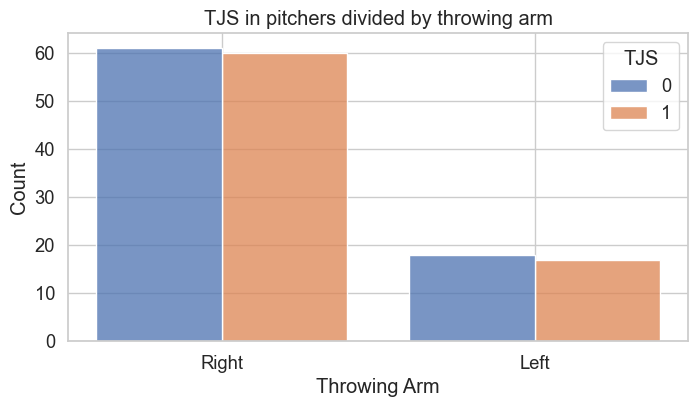

In [82]:
# Graph representing TJS in lefties and righties

plt.figure(figsize = (8, 4) )  #figure
ax = plt.axes() #axes
ax.set(title = "TJS in pitchers divided by throwing arm",  xticklabels=["Right", "Left"], xticks=[0, 1], xlabel="Throwing Arm") #Setting title, labels, ticks
sns.histplot(data=df, x="isLefty", discrete=True , shrink=.8, multiple="dodge", hue="TJS") #plotting



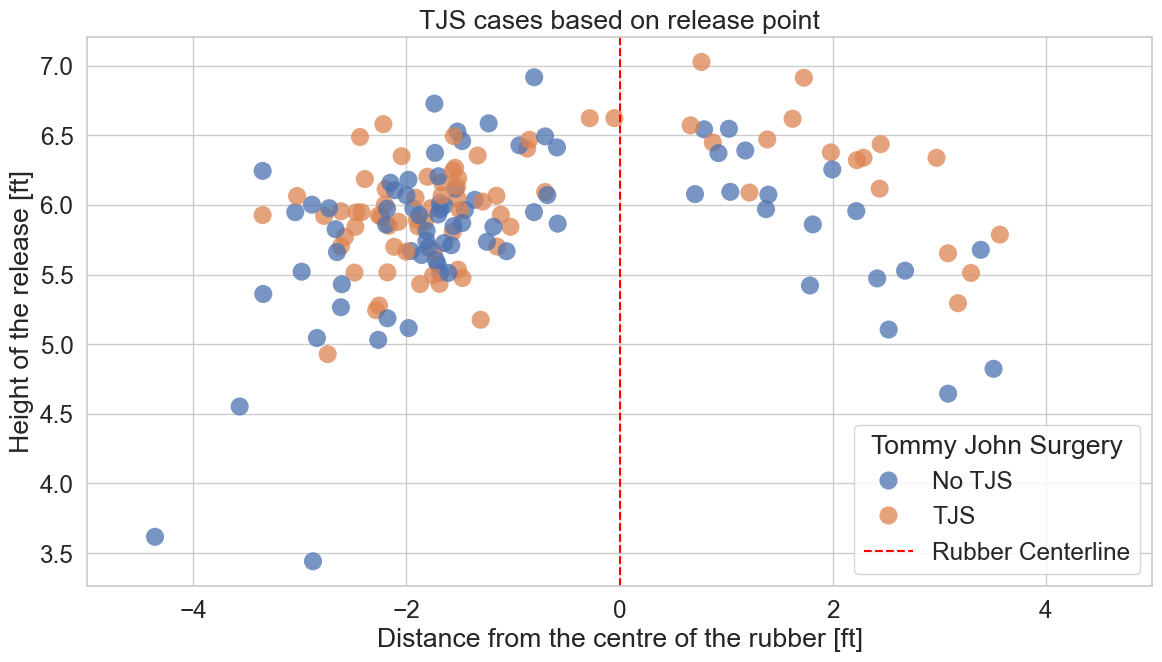

In [118]:
#APPROVED

plt.figure(figsize=(12, 7))  # Figure size
sns.set(style="whitegrid", font_scale=1.6)


g = sns.scatterplot(data=df, x="release_point_x_mean", y="release_point_z_mean", hue="TJS", s=170, alpha=0.75, edgecolor= "none")  #plotting

# Setting title, labels
plt.title("TJS cases based on release point")
plt.xlabel("Distance from the centre of the rubber [ft]")
plt.ylabel("Height of the release [ft]")


g.set(xlim=(-5, 5))  #setting x-axis limits to get 0 in the middle
plt.axvline(x=0, color='red', linestyle='--', label='Rubber Centerline')  #generating the centerline


handles, labels = g.get_legend_handles_labels()  #getting legend data

label_map = {"0": "No TJS", "1": "TJS"}  #label mapping
new_labels = [label_map.get(l, l) for l in labels] #generating legend labels
plt.legend(handles=handles, labels=new_labels, title="Tommy John Surgery") #modifying legend

plt.tight_layout()  #Tighting layout


<Axes: title={'center': 'TJS cases based on arm angle and extension'}, xlabel='release extension [ft]', ylabel='Arm angle in degrees'>

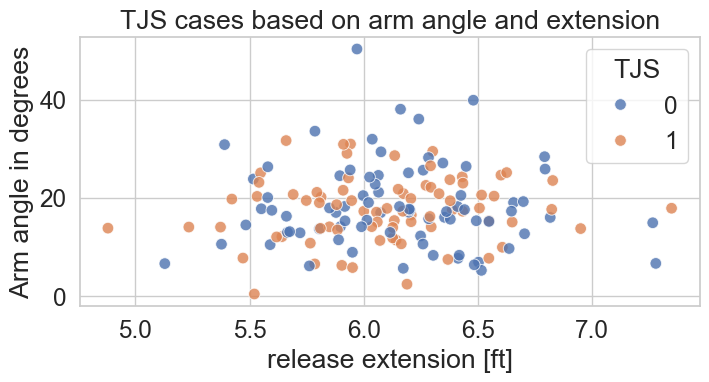

In [85]:
#Calculate the release angle between the centre of the rubber and the releasing hand 

def releasePoint(data):
    x = data["release_point_x_mean"]
    z = data["release_point_z_mean"]   #assigning inputs

    horizontal_component = abs(x)  #Because righties x is negative 
    vertical_component = z

    return math.degrees(math.atan(horizontal_component / vertical_component)) #returning arm-angle in degrees

df["arm_angle"] = df.apply(releasePoint, axis=1) #applying the function


#Graph representing arm angle and extension and hue is TJS
plt.figure(figsize = (8, 3.5) )  #figure
plt.title("TJS cases based on arm angle and extension") #Setting title
#Setting labels
plt.xlabel("release extension [ft]")
plt.ylabel("Arm angle in degrees")


sns.scatterplot(data=df, x="release_extension_mean", y="arm_angle", hue="TJS", s = 70, alpha=.8) #plotting


/var/folders/c6/mjv_3yhn2yq8cd7vd4x458kw0000gn/T/ipykernel_14193/1516207979.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set(title = "Fastball velo Righties and Lefties",  xticklabels=["Right", "Left"], xlabel="Throwing Arm", ylabel="Fastball Velocity [mph]", ylim=(85, 105)) #setting title, labels


<Axes: title={'center': 'Fastball velo Righties and Lefties'}, xlabel='Throwing Arm', ylabel='Fastball Velocity [mph]'>

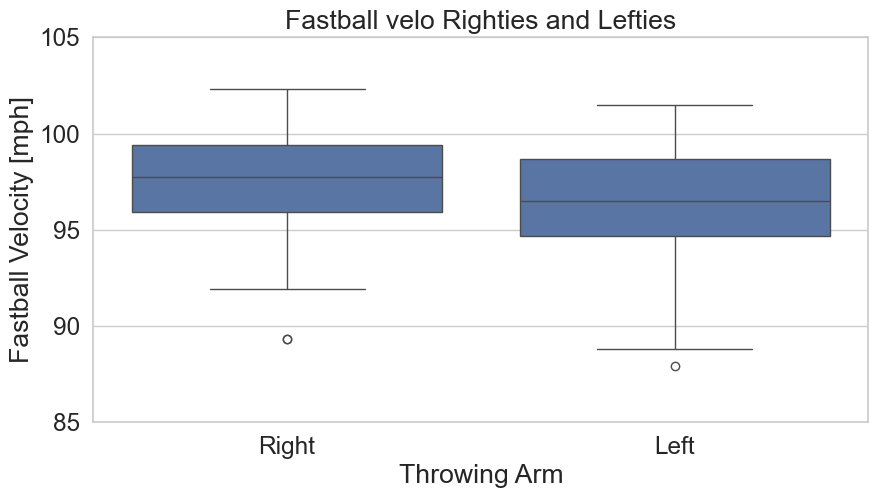

In [134]:
# Boxplot representing FF velo of lefties compared to righties

#APPROVED


plt.figure(figsize=(10, 5))  #figure
ax = plt.axes()  #axes
ax.set(title = "Fastball velo Righties and Lefties",  xticklabels=["Right", "Left"], xlabel="Throwing Arm", ylabel="Fastball Velocity [mph]", ylim=(85, 105)) #setting title, labels
#sns.stripplot(x="isLefty", y="FF_max_velo", data=df, jitter=.25, color='orange', alpha=0.4, size=8)  #Plotting stripplot
sns.boxplot(x="isLefty", y="FF_max_velo", data=df)  #plotting boxplot


/var/folders/c6/mjv_3yhn2yq8cd7vd4x458kw0000gn/T/ipykernel_14193/36522694.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set(title = "Fastball velo Righties and Lefties with TJS",  xticklabels=["Right", "Left"], xlabel="Throwing Arm", ylabel="Fastball Velocity [mph]")  #setting title, labels


<Axes: title={'center': 'Fastball velo Righties and Lefties with TJS'}, xlabel='Throwing Arm', ylabel='Fastball Velocity [mph]'>

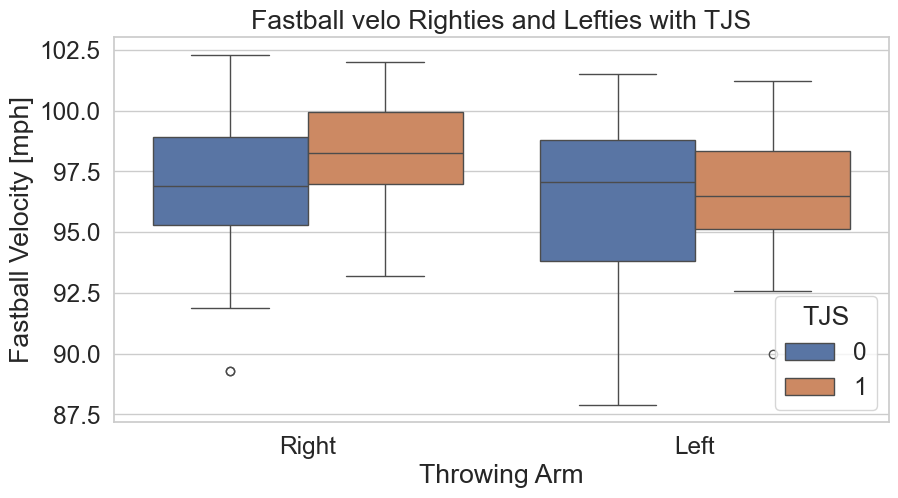

In [87]:
# Boxplot representing FF velo of lefties compared to righties, hue is TJS

plt.figure(figsize=(10, 5))  #figure
ax = plt.axes() #axes
ax.set(title = "Fastball velo Righties and Lefties with TJS",  xticklabels=["Right", "Left"], xlabel="Throwing Arm", ylabel="Fastball Velocity [mph]")  #setting title, labels
sns.boxplot(x="isLefty", y="FF_max_velo", data=df, hue="TJS") #Plotting

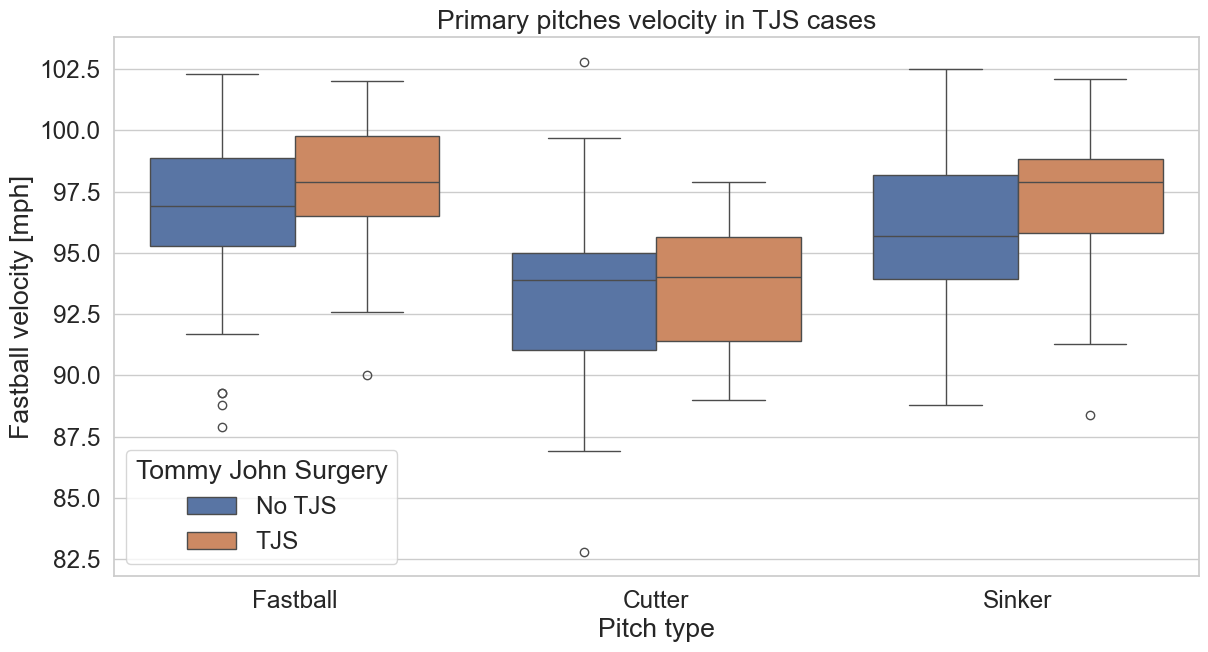

In [120]:
#Graph representing the 3 primary pitches in TJS cases

#APPROVED

plt.figure(figsize=(14, 7))  #figure
ax = plt.axes() #axes
ax.set(title = "Primary pitches velocity in TJS cases",xticks=[0, 1, 2] ,  xticklabels=["Fastball", "Cutter", "Sinker"], xlabel="Pitch type", ylabel="Fastball velocity [mph]")  #setting title, labels
#sns.stripplot(x="TJS", y="FF_max_velo", data=df, jitter=.25, color='orange', alpha=0.4, size=8)  #plotting stripplot
sns.boxplot(x=0, y="FF_max_velo", data=df, hue="TJS") #plotting fastball boxplot
sns.boxplot(x=1, y="FC_max_velo", data=df, hue="TJS") #plotting cutter boxplot
sns.boxplot(x=2, y="SI_max_velo", data=df, hue="TJS") #plotting sinker boxplot

plt.legend(title="Tommy John Surgery", labels=["No TJS", "TJS"])


<Axes: title={'center': 'TJS cases based on release distance from the rubber and the mean deviation of it'}, xlabel='Mean distance from the centre of the rubber [ft]', ylabel='Deviation of the release [ft]'>

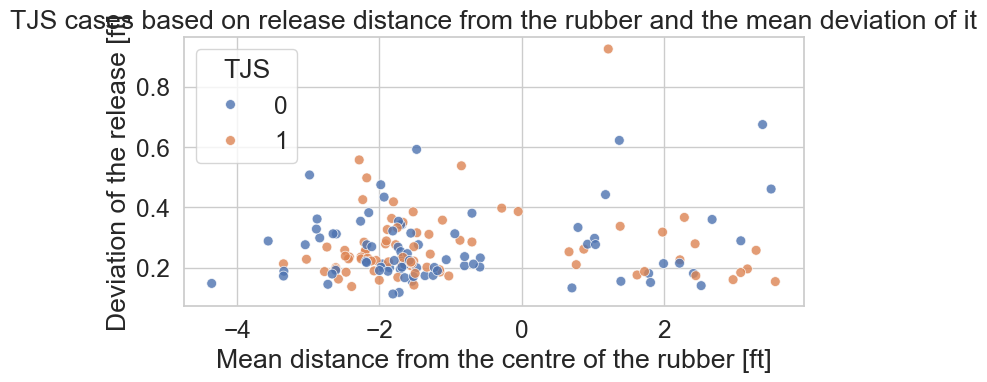

In [89]:
#Pitchers with higher release delta are highly exposed to TJS?

plt.figure(figsize = (8, 3.5) )  #figure
plt.title("TJS cases based on release distance from the rubber and the mean deviation of it") #setting title
#setting labels
plt.xlabel("Mean distance from the centre of the rubber [ft]")
plt.ylabel("Deviation of the release [ft]")


sns.scatterplot(data=df, x="release_point_x_mean", y="release_point_x_std_mean", hue="TJS", s = 50, alpha=.8)  #plotting


/var/folders/c6/mjv_3yhn2yq8cd7vd4x458kw0000gn/T/ipykernel_14193/158815135.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fastball_velo_bin["velo_bin"] = pd.cut(fastball_velo_bin["FF_max_velo"], bins=bins, labels=labels, right=False)  #assigning bins to raws


<Axes: title={'center': 'Cases of TJ Surgery divided in Fastball velocity bins'}, xlabel='Fastball Velocity [mph]', ylabel='Count'>

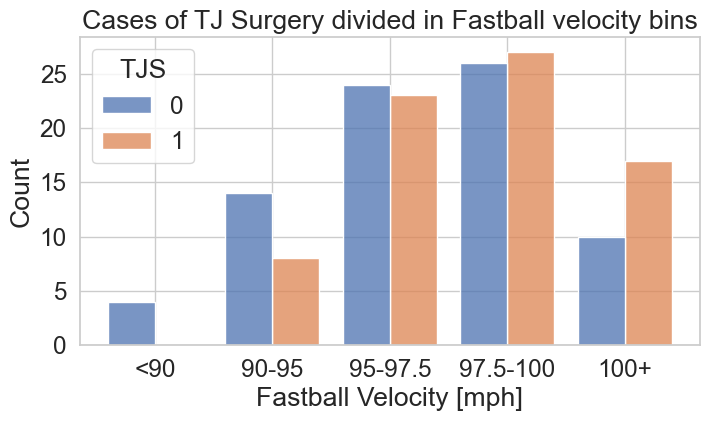

In [90]:
#Graph representing TJS cases divided in velocity bins

cols = ["FF_max_velo", "TJS"]   #Working cols
bins = [0, 90, 95, 97.5, 100, float('inf')]  #defining bins
labels = ["<90", "90-95", "95-97.5","97.5-100", "100+"] #defining bin labels

fastball_velo_bin = df[cols] #new working DataFrame
fastball_velo_bin["velo_bin"] = pd.cut(fastball_velo_bin["FF_max_velo"], bins=bins, labels=labels, right=False)  #assigning bins to raws

plt.figure(figsize = (8, 4) )  #figure
ax = plt.axes()   #axes
ax.set(title = "Cases of TJ Surgery divided in Fastball velocity bins", xlabel="Fastball Velocity [mph]")  #setting title, labels
sns.histplot(data=fastball_velo_bin, x="velo_bin", discrete=True, shrink=0.8, hue="TJS", multiple="dodge")  #plotting

#Boxplot 3 coppie di box,  1) primario con TJS o no TJS, 2) Secondario con / no TJS, 3) second secondario tjs/ no tjs

<Axes: title={'center': 'TJS cases based on release height and the mean deviation of it'}, xlabel='Mean release hight [ft]', ylabel='Deviation of the release height [ft]'>

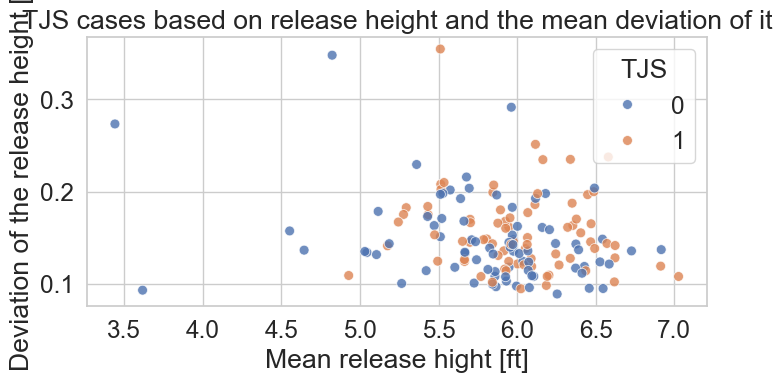

In [91]:
plt.figure(figsize = (8, 3.5) )  #figure
plt.title("TJS cases based on release height and the mean deviation of it") #setting title
#setting labels
plt.xlabel("Mean release hight [ft]")  
plt.ylabel("Deviation of the release height [ft]")


sns.scatterplot(data=df, x="release_point_z_mean", y="release_point_z_std_mean", hue="TJS", s = 50, alpha=.8) #plotting

<Axes: title={'center': 'TJS cases based on release extension and the mean deviation of it'}, xlabel='Mean release hight [ft]', ylabel='Deviation of the release extension [ft]'>

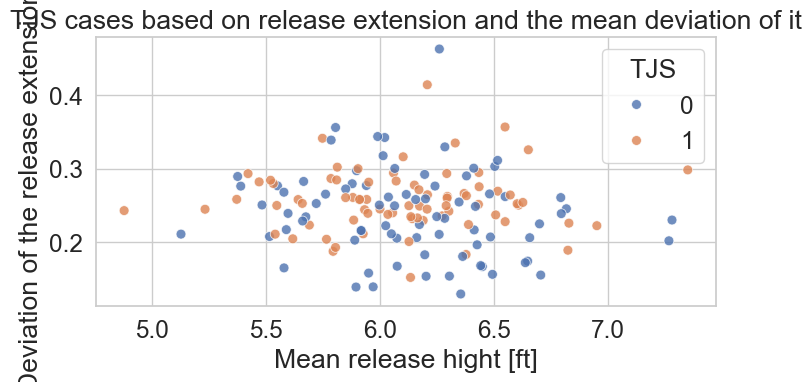

In [92]:
plt.figure(figsize = (8, 3.5) )  #figure
plt.title("TJS cases based on release extension and the mean deviation of it")  #setting title
#setting labels
plt.xlabel("Mean release hight [ft]")
plt.ylabel("Deviation of the release extension [ft]")


sns.scatterplot(data=df, x="release_extension_mean", y="release_extension_std_mean", hue="TJS", s = 50, alpha=.8) #plotting

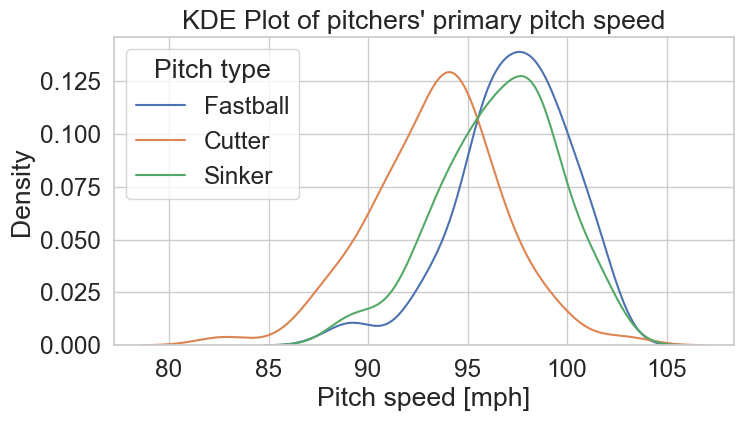

In [93]:
#Graph representing the velos of the three primary pitches

cols = ["FF_max_velo", "FC_max_velo", "SI_max_velo"] #working columns
labels = ["Fastball", "Cutter", "Sinker"] #labels for the legend

plt.figure(figsize=(8, 4)) #figure
ax = plt.axes() #axes
ax.set(xlabel="Pitch speed [mph]", title="KDE Plot of pitchers' primary pitch speed") #setting title, labels

for col, label in zip(cols, labels):
    sns.kdeplot(df[col], ax=ax, label=label) #plotting 3 KDE plots

ax.legend(title="Pitch type") #setting legend title

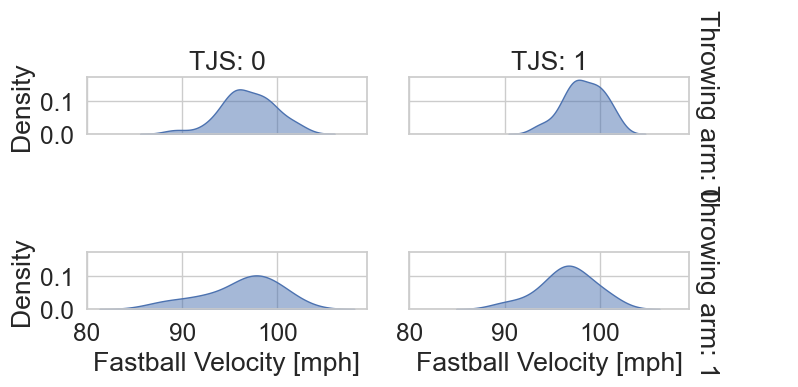

In [94]:
g = sns.FacetGrid(df, row="isLefty", col="TJS",    #prova
                  margin_titles=True, height=2, aspect = 2)
g.map(sns.kdeplot, "FF_max_velo", fill=True, common_norm=False, alpha=0.5, warn_singular=False).add_legend()
g.set_axis_labels("Fastball Velocity [mph]", "Density")
g.set_titles(row_template='Throwing arm: {row_name}', col_template='TJS: {col_name}')
g.tight_layout().despine(right=False, top=False)

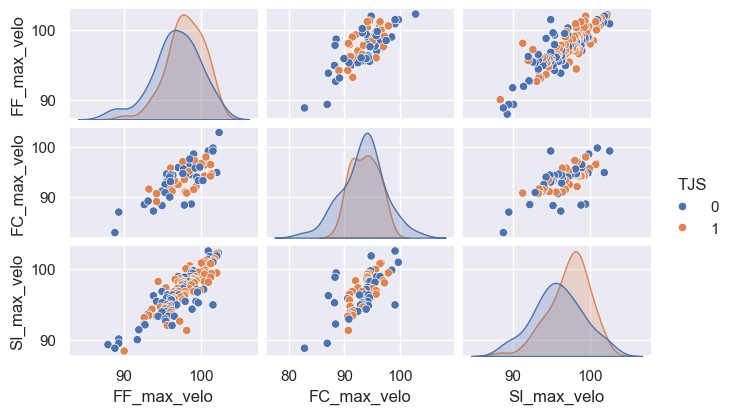

In [95]:
cols.insert(3, "TJS")  #PROVA

sns.set(style = 'darkgrid', font_scale=1)
sns.pairplot(df[cols], hue='TJS', height=1.4, aspect=1.6).tight_layout()

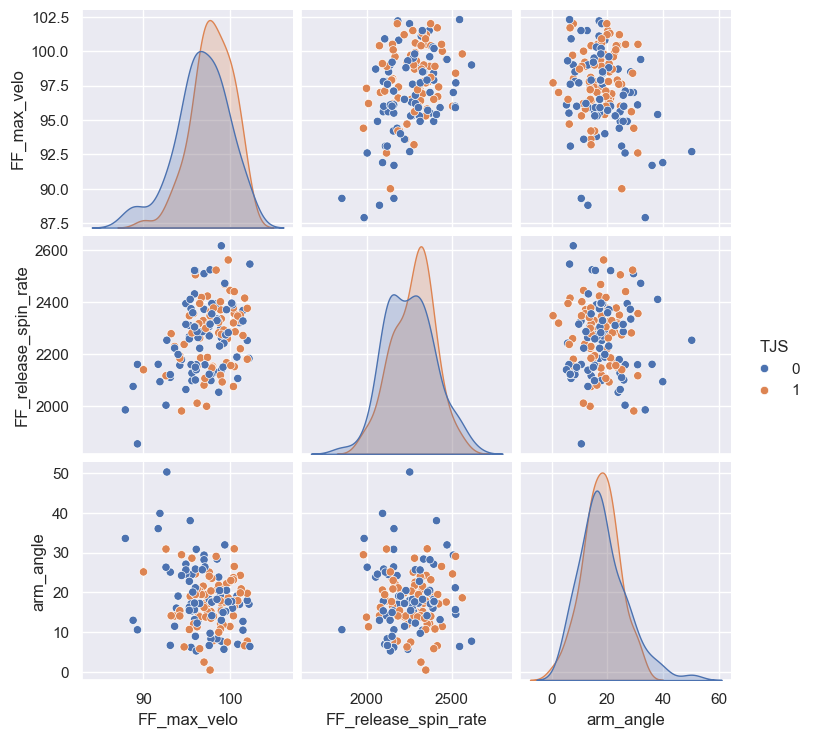

In [96]:
sns.pairplot(df, vars=["FF_max_velo", "FF_release_spin_rate", "arm_angle"], hue="TJS") #prova

<Axes: xlabel='isLefty', ylabel='TJS'>

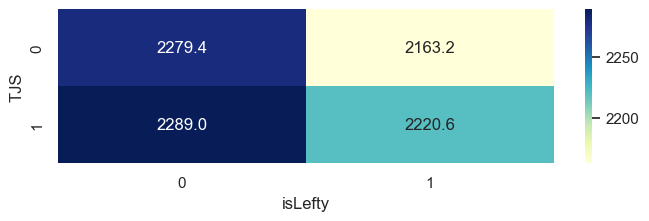

In [97]:
p_velo = df.pivot_table(values="FF_release_spin_rate", index="TJS", columns="isLefty", aggfunc="mean", observed=False) #prova

plt.figure(figsize = (8, 2) )
sns.heatmap(p_velo, annot=True, cmap="YlGnBu", fmt=".1f")

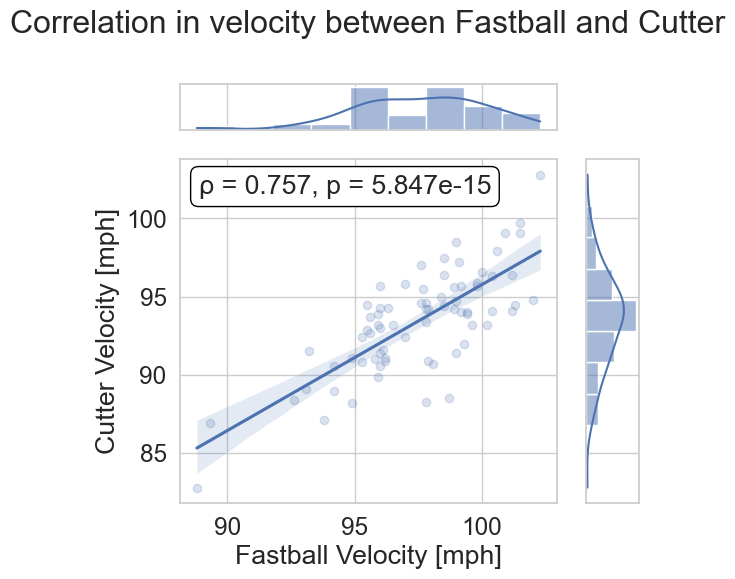

In [131]:
#APPROVED
#Graph representing correlation between fastball velocity and sinker velocity

#masks to avoid Nan
m = df["FF_max_velo"].notnull() 
m1 = df["FC_max_velo"].notnull()
masked_df1 = df[['FF_max_velo', "FC_max_velo"]][m & m1] #mask application

g = sns.jointplot(masked_df1, x = 'FF_max_velo', y = "FC_max_velo", kind='reg', height = 6.0, ratio = 5,
              joint_kws = {'scatter_kws':dict(alpha=0.2)})   #Plotting

#Setting title, labels
g.set_axis_labels("Fastball Velocity [mph]", "Cutter Velocity [mph]")   
g.fig.suptitle("Correlation in velocity between Fastball and Cutter")

g.fig.tight_layout() #Tighting layout


r, p = stats.pearsonr( masked_df1['FF_max_velo'], masked_df1['FC_max_velo'])  #Calculate pearson correlation of the data
g.ax_joint.annotate(f'ρ = {r:.3f}, p = {p:.3e}', xy=(0.05, 0.92), 
                    xycoords='axes fraction', ha='left', va='center', 
                    bbox={'boxstyle': 'round', 'fc': 'white', 'ec': 'black'})  #Display pearson value on the graph
sns.despine(top=False, right=False) # Setting boarders

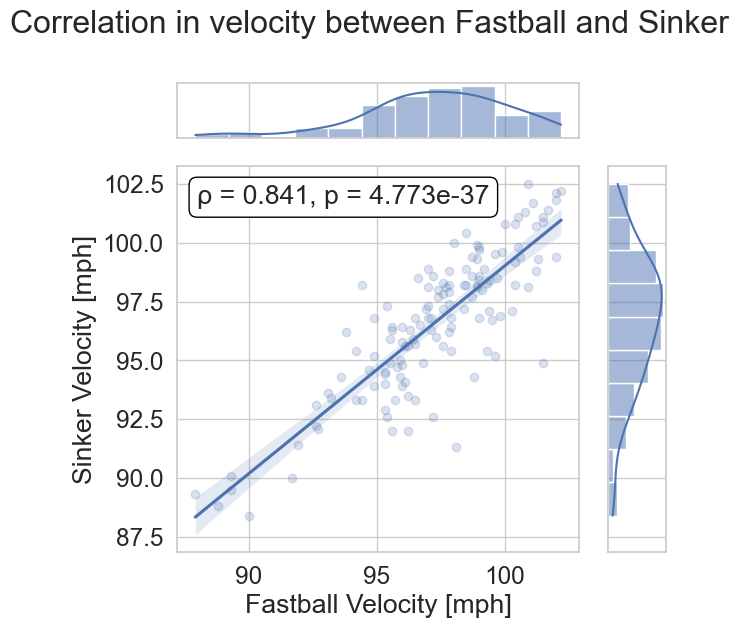

In [132]:
#APPROVED
#Graph representing correlation between fastball velocity and cutter velocity

m = df["FF_max_velo"].notnull() #masks to avoid Nan
m1 = df["SI_max_velo"].notnull() 
masked_df1 = df[['FF_max_velo', "SI_max_velo"]][m & m1] #applicate mask

g = sns.jointplot(masked_df1, x = 'FF_max_velo', y = "SI_max_velo", kind='reg', height = 6.5, ratio = 5,
              joint_kws = {'scatter_kws':dict(alpha=0.2)})   #Plotting

g.set_axis_labels("Fastball Velocity [mph]", "Sinker Velocity [mph]")   #setting labels
g.fig.suptitle("Correlation in velocity between Fastball and Sinker")
g.fig.tight_layout()


r, p = stats.pearsonr( masked_df1['FF_max_velo'], masked_df1['SI_max_velo'])  #Calculate pearson correlation of the data
g.ax_joint.annotate(f'ρ = {r:.3f}, p = {p:.3e}', xy=(0.05, 0.92), 
                    xycoords='axes fraction', ha='left', va='center', 
                    bbox={'boxstyle': 'round', 'fc': 'white', 'ec': 'black'})  #Display pearson value on the graph
sns.despine(top=False, right=False) # Setting boarders

<ErrorbarContainer object of 3 artists>

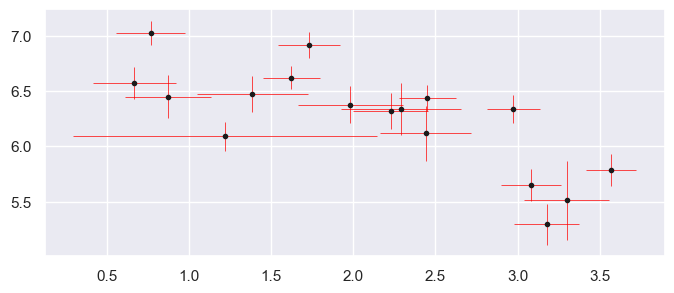

In [100]:
plt.figure(figsize = (8, 3.2) )  #prova

plt.errorbar(data=df[(df["TJS"] == 1) & (df["isLefty"] == 1)],x="release_point_x_mean", y="release_point_z_mean" ,xerr="release_point_x_std_mean" , yerr="release_point_z_std_mean", fmt='.k', ecolor="red", elinewidth=.5)

<ErrorbarContainer object of 3 artists>

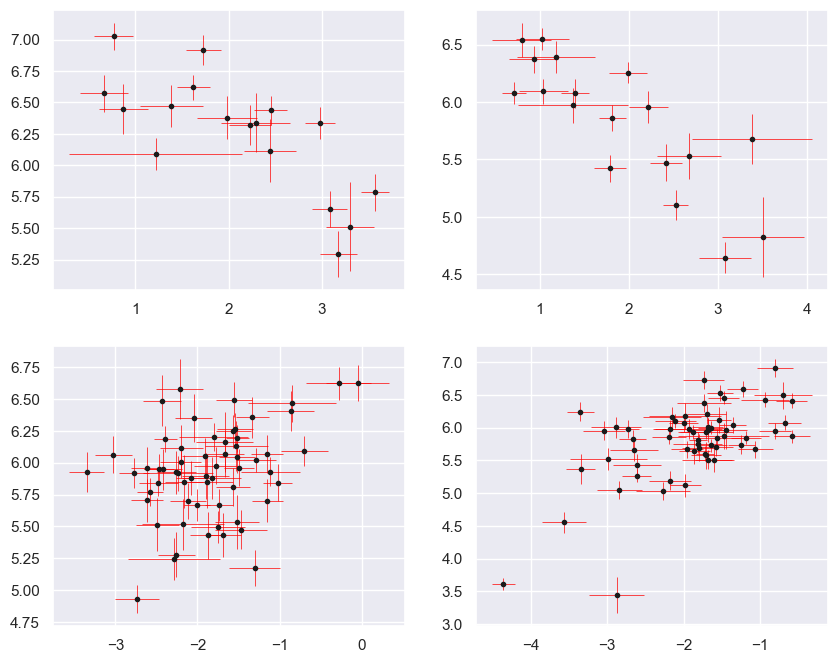

<Figure size 800x320 with 0 Axes>

In [101]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))    #prova

plt.figure(figsize = (8, 3.2) )
axes[0 , 0].errorbar(data=df[(df["TJS"] == 1) & (df["isLefty"] == 1)],x="release_point_x_mean", y="release_point_z_mean" ,xerr="release_point_x_std_mean" , yerr="release_point_z_std_mean", fmt='.k', ecolor="red", elinewidth=.5)
axes[0 , 1].errorbar(data=df[(df["TJS"] == 0) & (df["isLefty"] == 1)],x="release_point_x_mean", y="release_point_z_mean" ,xerr="release_point_x_std_mean" , yerr="release_point_z_std_mean", fmt='.k', ecolor="red", elinewidth=.5)
axes[1 , 0].errorbar(data=df[(df["TJS"] == 1) & (df["isLefty"] == 0)],x="release_point_x_mean", y="release_point_z_mean" ,xerr="release_point_x_std_mean" , yerr="release_point_z_std_mean", fmt='.k', ecolor="red", elinewidth=.5)
axes[1 , 1].errorbar(data=df[(df["TJS"] == 0) & (df["isLefty"] == 0)],x="release_point_x_mean", y="release_point_z_mean" ,xerr="release_point_x_std_mean" , yerr="release_point_z_std_mean", fmt='.k', ecolor="red", elinewidth=.5)



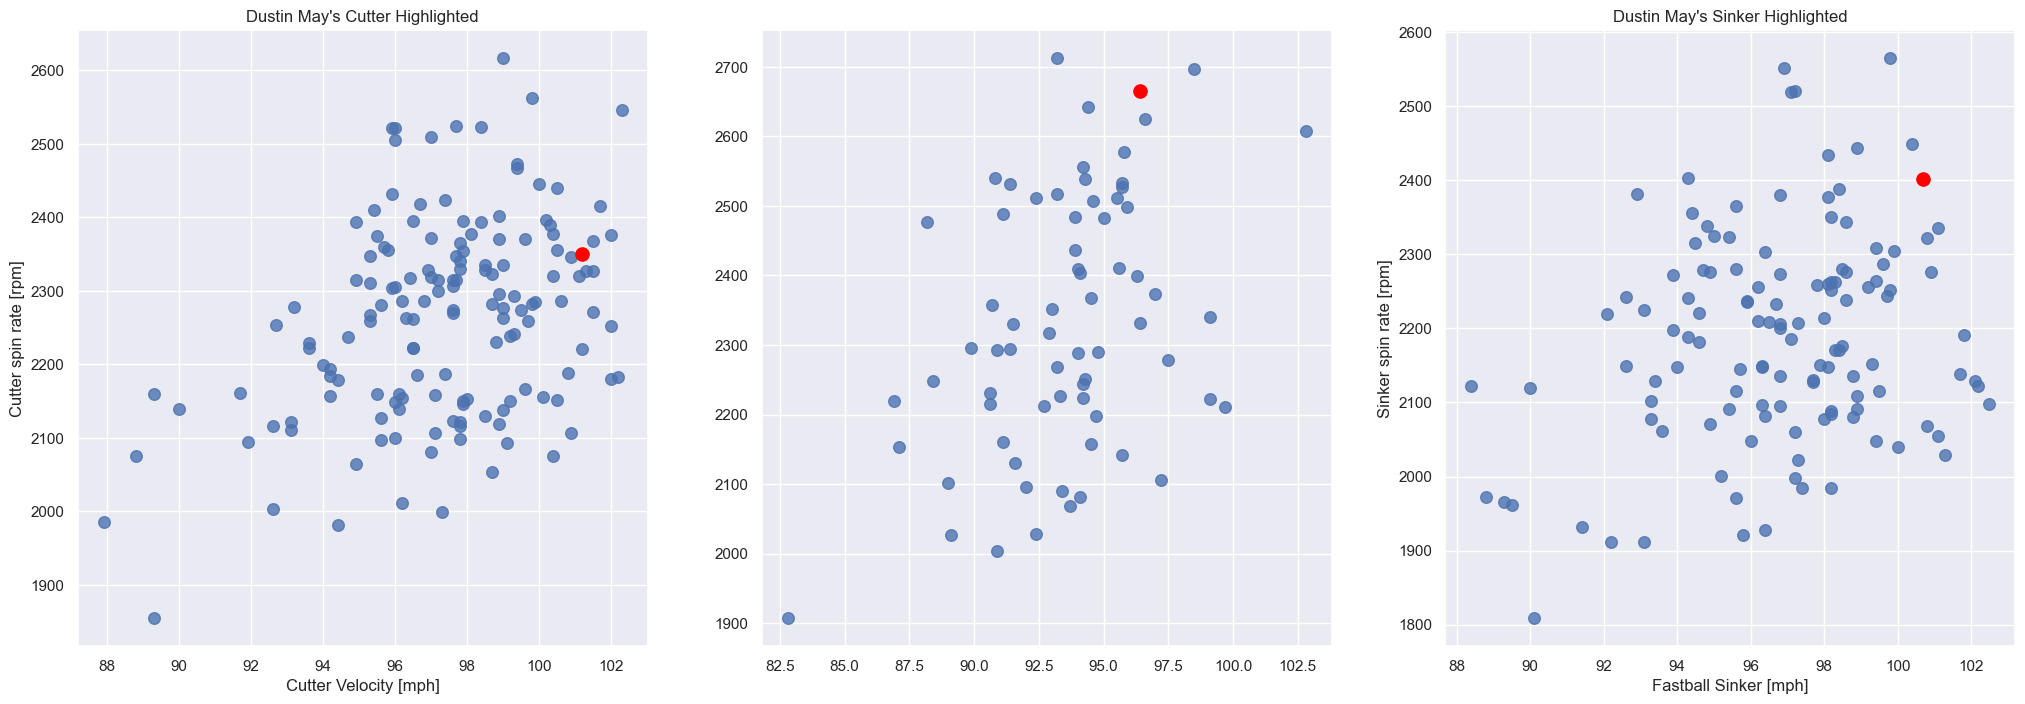

In [102]:
#Dustin May study

#Why? He is known for high spinrates, high velocity in main pitches that brought him to big results, unfortunatly he had Tommy Jhon so he is a great name to analyze.

m = df["Name"] == "Dustin May"    #Warking dataframe creation
DM_df = df[m]

fig, axes = plt.subplots(1, 3, figsize=(25, 8))    #Setting up multiple subplots

#Scatterplot N°1
axes[0].set(title="Dustin May's Fastball Highlighted", xlabel="Fastball Velocity [mph]", ylabel="Fastball spin rate [rpm]")
axes[0].scatter(data=df[~m], x="FF_max_velo", y="FF_release_spin_rate", s = 70, alpha=.8)
axes[0].scatter(data=DM_df, x="FF_max_velo", y="FF_release_spin_rate", s = 90, color="red")

#Scatterplot N°2
axes[0].set(title="Dustin May's Cutter Highlighted", xlabel="Cutter Velocity [mph]", ylabel="Cutter spin rate [rpm]")
axes[1].scatter(data=df[~m], x="FC_max_velo", y="FC_release_spin_rate", s = 70, alpha=.8)
axes[1].scatter(data=DM_df, x="FC_max_velo", y="FC_release_spin_rate", s = 90, color="red")

#Scatterplot N°3
axes[2].set(title="Dustin May's Sinker Highlighted", xlabel="Fastball Sinker [mph]", ylabel="Sinker spin rate [rpm]")
axes[2].scatter(data=df[~m], x="SI_max_velo", y="SI_release_spin_rate", s = 70, alpha=.8)
axes[2].scatter(data=DM_df, x="SI_max_velo", y="SI_release_spin_rate", s = 90, color="red")

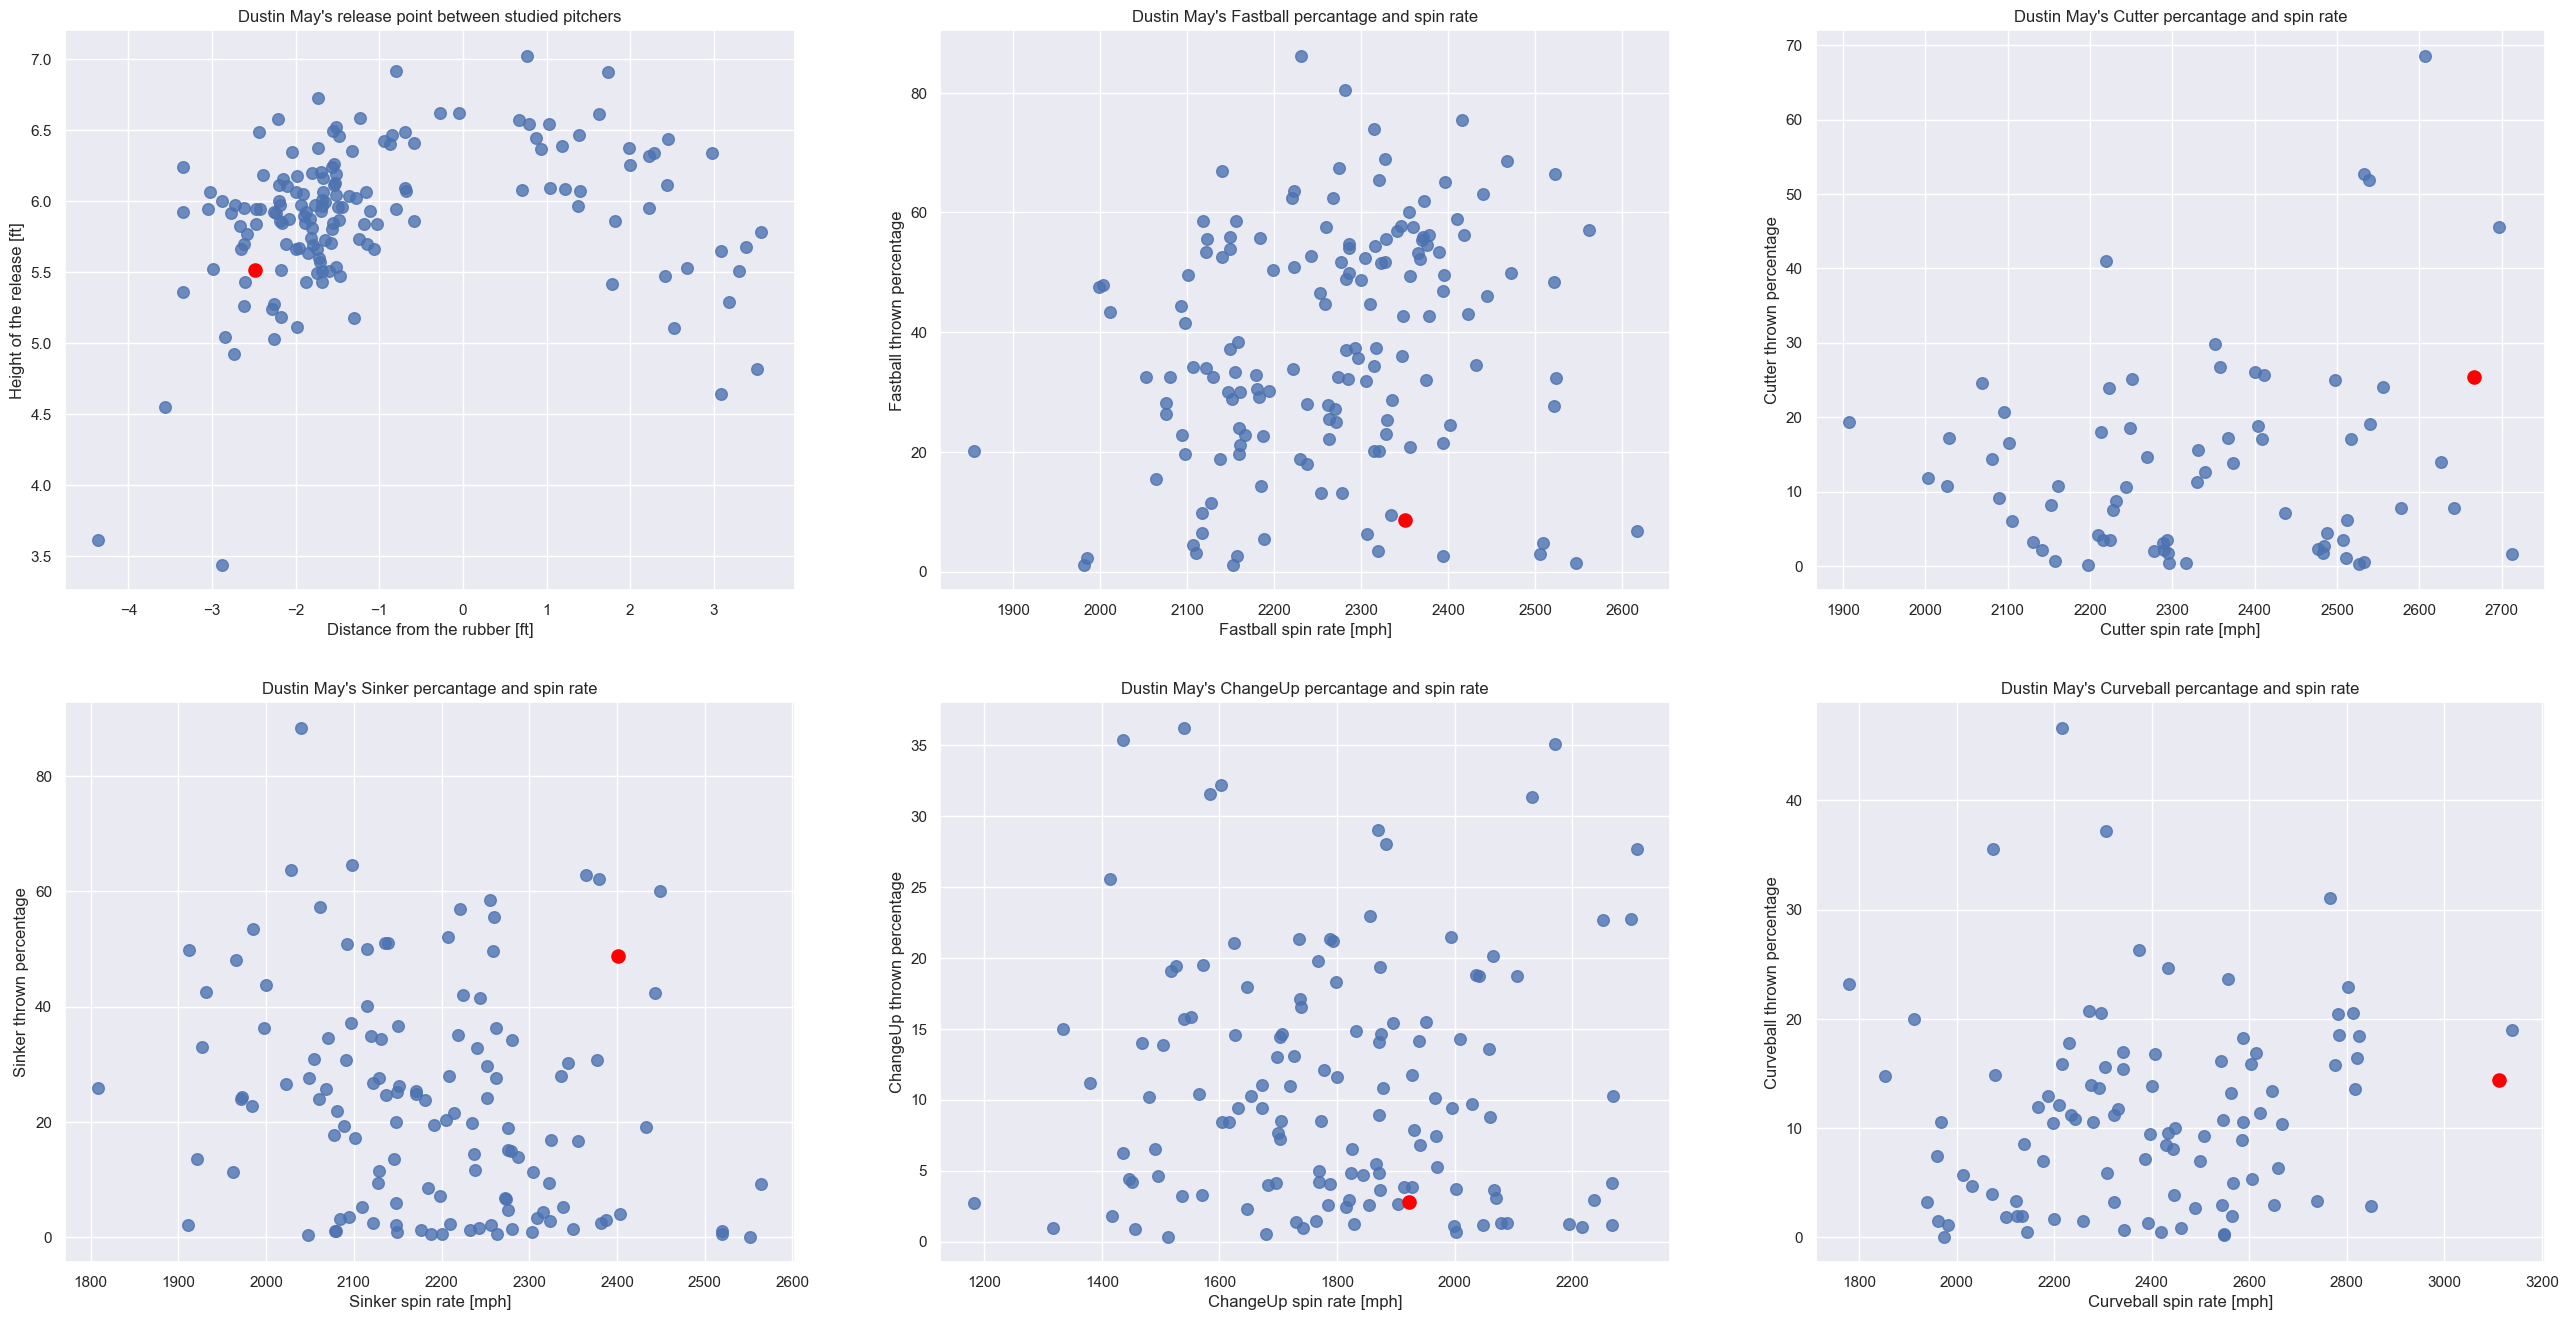

In [103]:
#To mesure the effectiveness of a pitch we se how many times is thrown and what is the spin of it
#For Dustin May we'll study FF, FC, SI, CH, CU + Release Point

fig, axes = plt.subplots(2, 3, figsize=(32, 16))    #Setting up multiple subplots

#Release Point
axes[0,0].set(title="Dustin May's release point between studied pitchers", xlabel="Distance from the rubber [ft]", ylabel="Height of the release [ft]")
axes[0,0].scatter(data=df[~m], x="release_point_x_mean", y="release_point_z_mean", s = 70, alpha=.8)
axes[0,0].scatter(data=DM_df, x="release_point_x_mean", y="release_point_z_mean", s = 90, color="red")

# FF
axes[0,1].set(title="Dustin May's Fastball percantage and spin rate", xlabel="Fastball spin rate [mph]", ylabel="Fastball thrown percentage")
axes[0,1].scatter(data=df[~m], x="FF_release_spin_rate", y="FF_percentage", s = 70, alpha=.8)
axes[0,1].scatter(data=DM_df, x="FF_release_spin_rate", y="FF_percentage", s = 90, color="red")

# FC
axes[0,2].set(title="Dustin May's Cutter percantage and spin rate", xlabel="Cutter spin rate [mph]", ylabel="Cutter thrown percentage")
axes[0,2].scatter(data=df[~m], x="FC_release_spin_rate", y="FC_percentage", s = 70, alpha=.8)
axes[0,2].scatter(data=DM_df, x="FC_release_spin_rate", y="FC_percentage", s = 90, color="red")

# SI
axes[1,0].set(title="Dustin May's Sinker percantage and spin rate", xlabel="Sinker spin rate [mph]", ylabel="Sinker thrown percentage")
axes[1,0].scatter(data=df[~m], x="SI_release_spin_rate", y="SI_percentage", s = 70, alpha=.8)
axes[1,0].scatter(data=DM_df, x="SI_release_spin_rate", y="SI_percentage", s = 90, color="red")

# CH
axes[1,1].set(title="Dustin May's ChangeUp percantage and spin rate", xlabel="ChangeUp spin rate [mph]", ylabel="ChangeUp thrown percentage")
axes[1,1].scatter(data=df[~m], x="CH_release_spin_rate", y="CH_percentage", s = 70, alpha=.8)
axes[1,1].scatter(data=DM_df, x="CH_release_spin_rate", y="CH_percentage", s = 90, color="red")

# CU
axes[1,2].set(title="Dustin May's Curveball percantage and spin rate", xlabel="Curveball spin rate [mph]", ylabel="Curveball thrown percentage")
axes[1,2].scatter(data=df[~m], x="CU_release_spin_rate", y="CU_percentage", s = 70, alpha=.8)
axes[1,2].scatter(data=DM_df, x="CU_release_spin_rate", y="CU_percentage", s = 90, color="red")


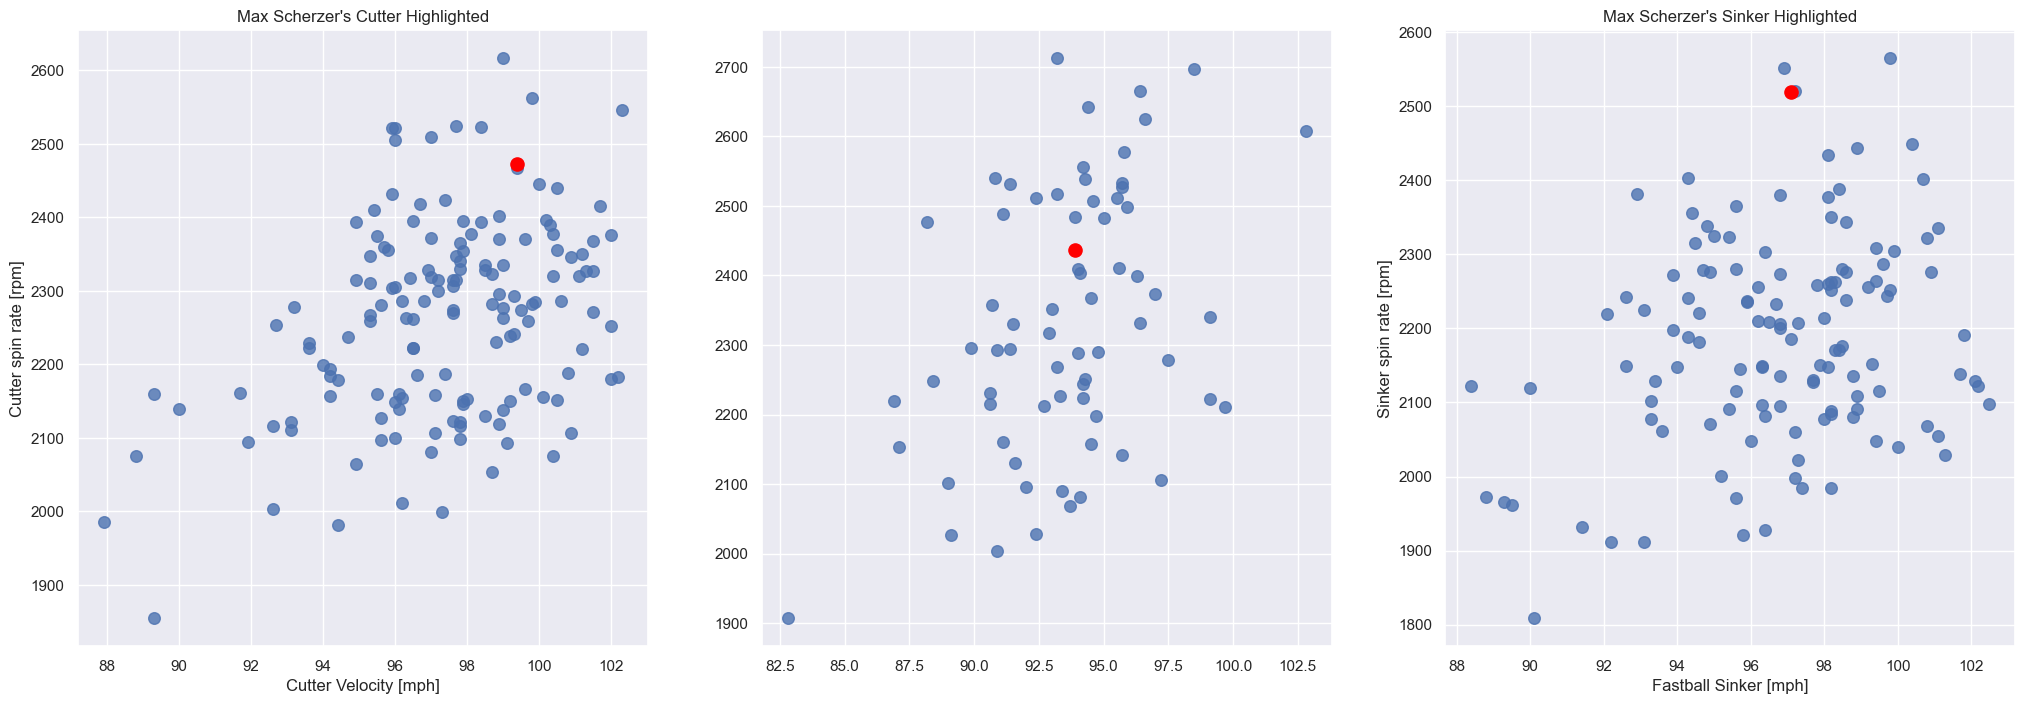

In [104]:
#Max Scherzer study

#Why? He is a veteran in the game, he has 18 years of service in mlb

m = df["Name"] == "Max Scherzer"    #Warking dataframe creation
MS_df = df[m]

fig, axes = plt.subplots(1, 3, figsize=(25, 8))    #Setting up multiple subplots

#Scatterplot N°1
axes[0].set(title="Max Scherzer's Fastball Highlighted", xlabel="Fastball Velocity [mph]", ylabel="Fastball spin rate [rpm]")
axes[0].scatter(data=df[~m], x="FF_max_velo", y="FF_release_spin_rate", s = 70, alpha=.8)
axes[0].scatter(data=MS_df, x="FF_max_velo", y="FF_release_spin_rate", s = 90, color="red")

#Scatterplot N°2
axes[0].set(title="Max Scherzer's Cutter Highlighted", xlabel="Cutter Velocity [mph]", ylabel="Cutter spin rate [rpm]")
axes[1].scatter(data=df[~m], x="FC_max_velo", y="FC_release_spin_rate", s = 70, alpha=.8)
axes[1].scatter(data=MS_df, x="FC_max_velo", y="FC_release_spin_rate", s = 90, color="red")

#Scatterplot N°3
axes[2].set(title="Max Scherzer's Sinker Highlighted", xlabel="Fastball Sinker [mph]", ylabel="Sinker spin rate [rpm]")
axes[2].scatter(data=df[~m], x="SI_max_velo", y="SI_release_spin_rate", s = 70, alpha=.8)
axes[2].scatter(data=MS_df, x="SI_max_velo", y="SI_release_spin_rate", s = 90, color="red")

<Axes: title={'center': "Max Scherzer's release point between studied pitchers"}, xlabel='Distance from the rubber [ft]', ylabel='Height of the release [ft]'>

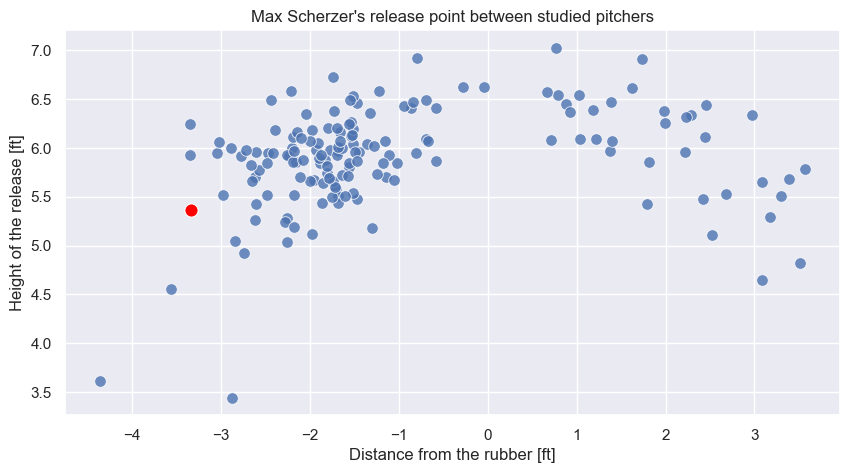

In [105]:
#Release Point
plt.figure(figsize=(10,5))
ax = plt.axes()
ax.set(title="Max Scherzer's release point between studied pitchers", xlabel="Distance from the rubber [ft]", ylabel="Height of the release [ft]")
sns.scatterplot(data=df[~m], x="release_point_x_mean", y="release_point_z_mean", s = 70, alpha=.8)
sns.scatterplot(data=MS_df, x="release_point_x_mean", y="release_point_z_mean", s = 90, color="red")

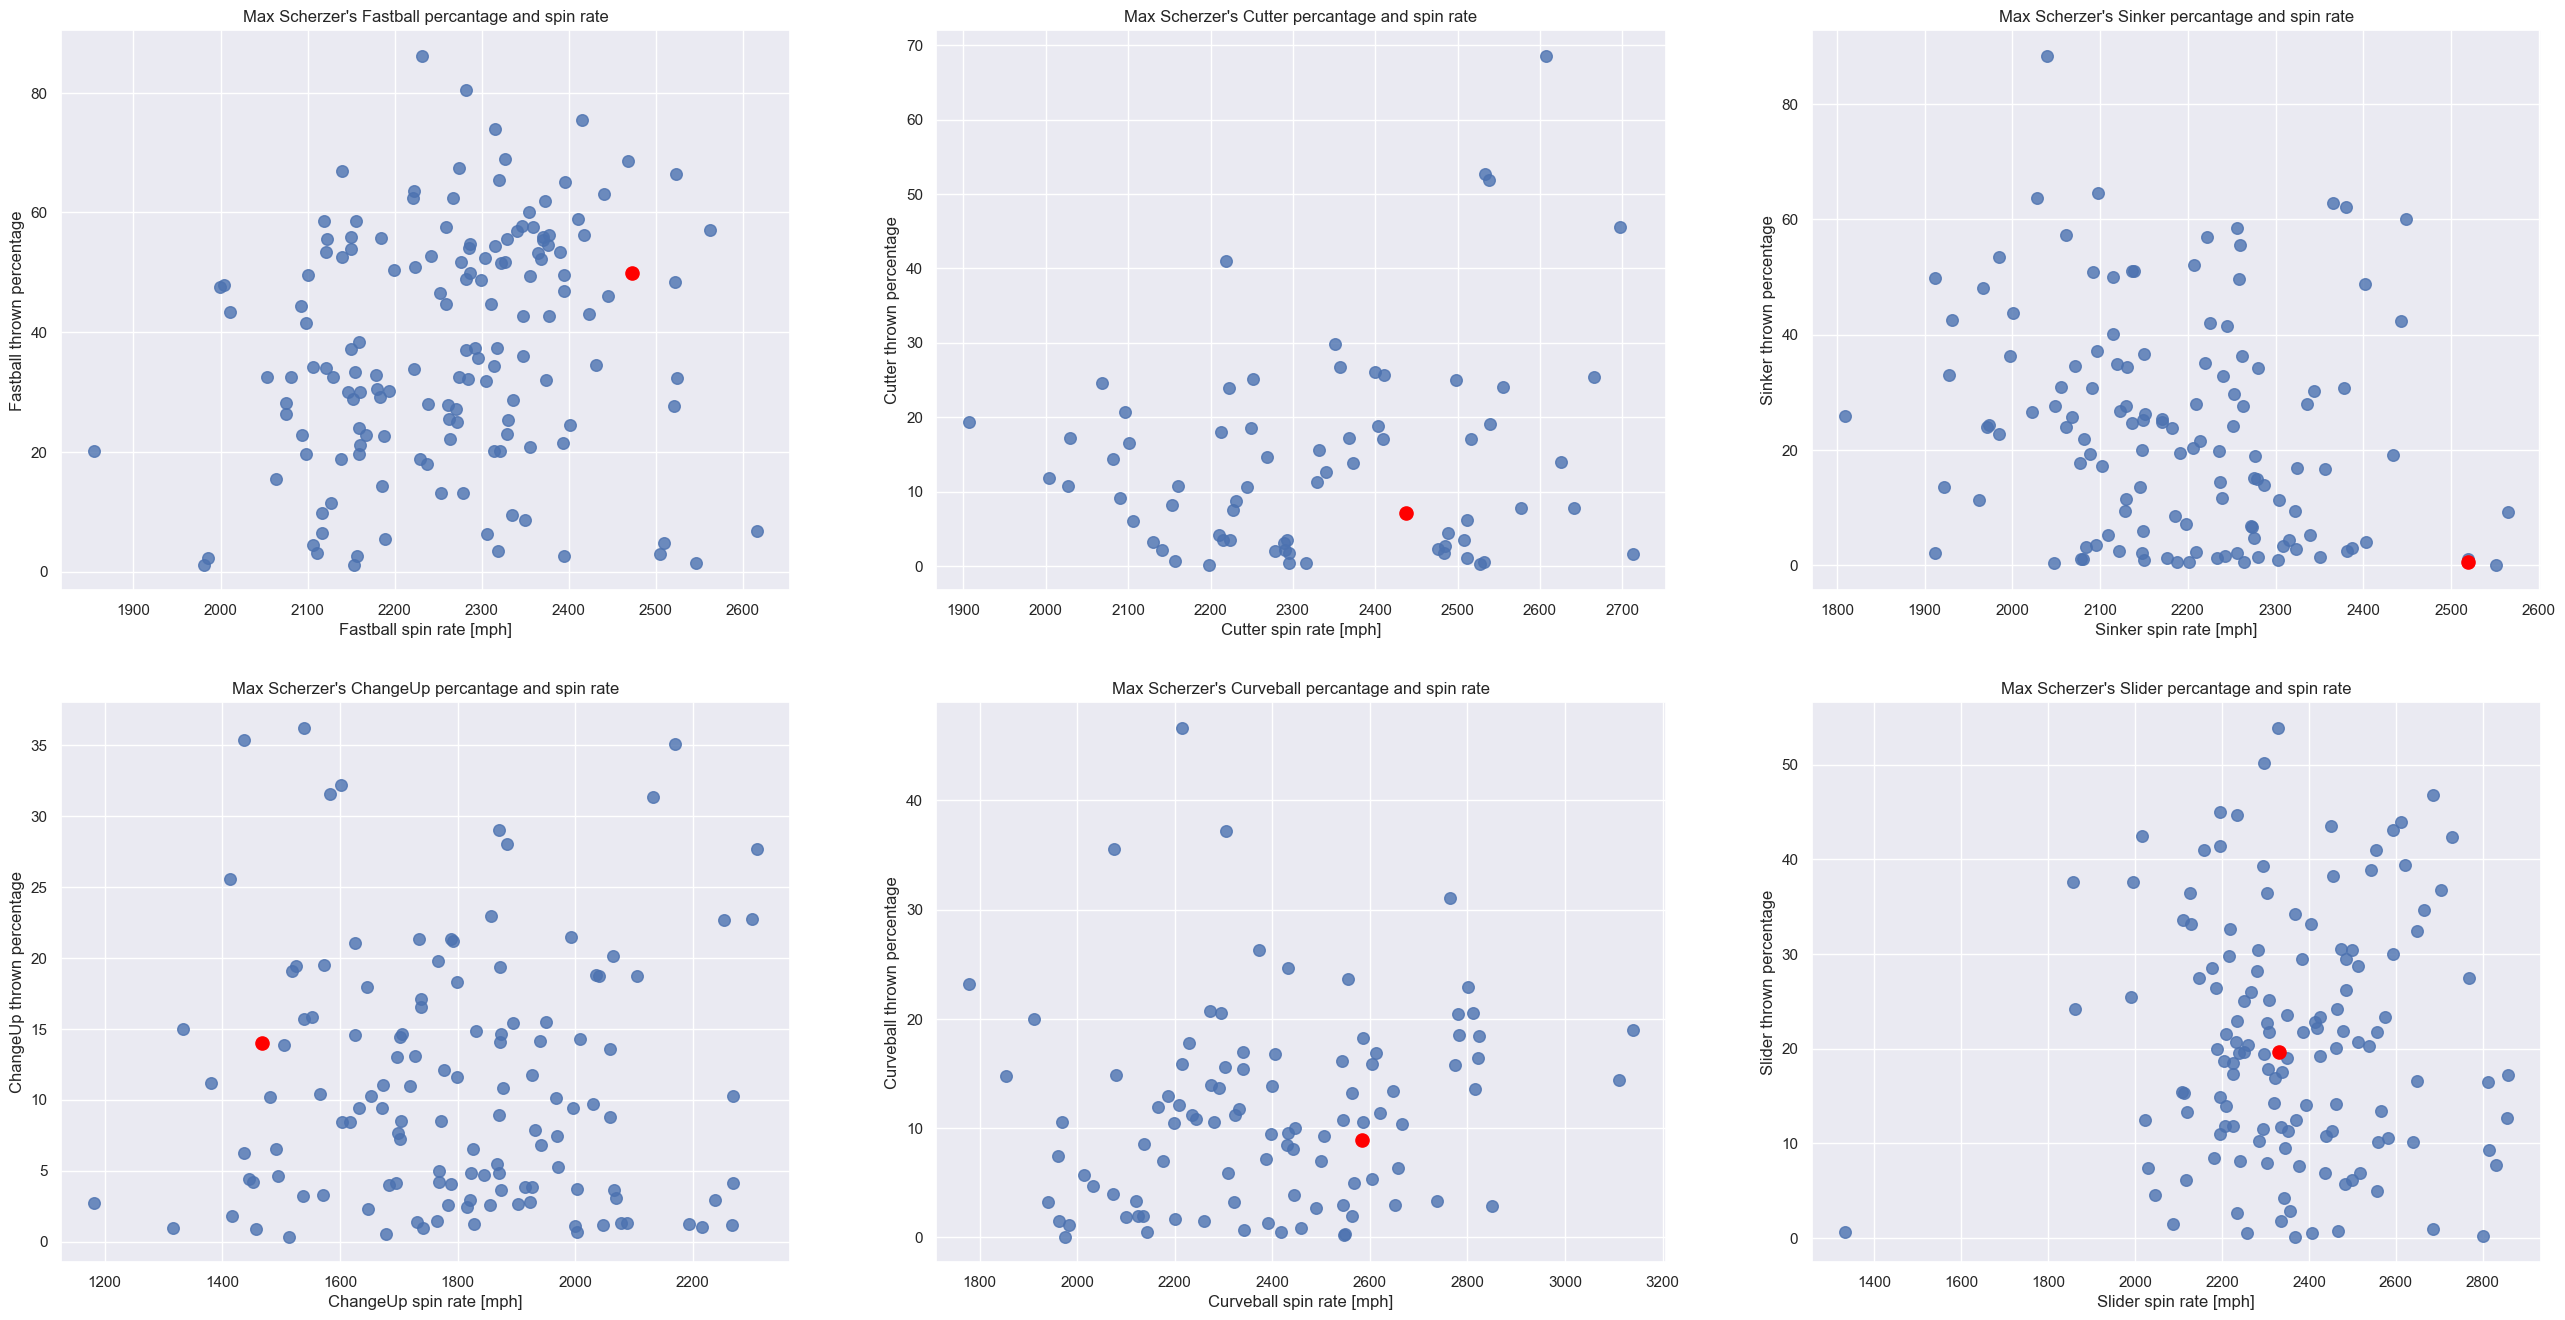

In [106]:
#To mesure the effectiveness of a pitch we se how many times is thrown and what is the spin of it
#For Max Scherzer we'll study FF, FC, SI, CH, CU, SL

fig, axes = plt.subplots(2, 3, figsize=(32, 16))    #Setting up multiple subplots



# FF
axes[0,0].set(title="Max Scherzer's Fastball percantage and spin rate", xlabel="Fastball spin rate [mph]", ylabel="Fastball thrown percentage")
axes[0,0].scatter(data=df[~m], x="FF_release_spin_rate", y="FF_percentage", s = 70, alpha=.8)
axes[0,0].scatter(data=MS_df, x="FF_release_spin_rate", y="FF_percentage", s = 90, color="red")

# FC
axes[0,1].set(title="Max Scherzer's Cutter percantage and spin rate", xlabel="Cutter spin rate [mph]", ylabel="Cutter thrown percentage")
axes[0,1].scatter(data=df[~m], x="FC_release_spin_rate", y="FC_percentage", s = 70, alpha=.8)
axes[0,1].scatter(data=MS_df, x="FC_release_spin_rate", y="FC_percentage", s = 90, color="red")

# SI
axes[0,2].set(title="Max Scherzer's Sinker percantage and spin rate", xlabel="Sinker spin rate [mph]", ylabel="Sinker thrown percentage")
axes[0,2].scatter(data=df[~m], x="SI_release_spin_rate", y="SI_percentage", s = 70, alpha=.8)
axes[0,2].scatter(data=MS_df, x="SI_release_spin_rate", y="SI_percentage", s = 90, color="red")

# CH
axes[1,0].set(title="Max Scherzer's ChangeUp percantage and spin rate", xlabel="ChangeUp spin rate [mph]", ylabel="ChangeUp thrown percentage")
axes[1,0].scatter(data=df[~m], x="CH_release_spin_rate", y="CH_percentage", s = 70, alpha=.8)
axes[1,0].scatter(data=MS_df, x="CH_release_spin_rate", y="CH_percentage", s = 90, color="red")

# CU
axes[1,1].set(title="Max Scherzer's Curveball percantage and spin rate", xlabel="Curveball spin rate [mph]", ylabel="Curveball thrown percentage")
axes[1,1].scatter(data=df[~m], x="CU_release_spin_rate", y="CU_percentage", s = 70, alpha=.8)
axes[1,1].scatter(data=MS_df, x="CU_release_spin_rate", y="CU_percentage", s = 90, color="red")

# SL
axes[1,2].set(title="Max Scherzer's Slider percantage and spin rate", xlabel="Slider spin rate [mph]", ylabel="Slider thrown percentage")
axes[1,2].scatter(data=df[~m], x="SL_release_spin_rate", y="SL_percentage", s = 70, alpha=.8)
axes[1,2].scatter(data=MS_df, x="SL_release_spin_rate", y="SL_percentage", s = 90, color="red")

In [ ]:
# Situazione attuale:

#Che grfici portare?

# 1) Boxplot of the fastball, sinker, cutter velo in TJS cases 

# 2) Sinker and Cutter corralation with Fastball in velocity

# 3) Fastball velo in lefties and righties that confirms the myth

# 4) Scatterplot of TJS cases in release points


#In ordine: 

# Introduzione del dataset, spiegazione: cos'è un lanciatore? Cosa deve fare? Tre lanci primari

# fig. 3: Dire che ci sono lanciatori destri e mancini e spiegare il mito della velocità in base al braccio di lancio, a quel punto far vedere il grafico che lo dimostra.

# figura 1: far vedere che in genere chi subisce la TJS tira più forte rispetto a chi non la fa.

# figura 2: collegarsi a fig.1 e far vedere che c'è correlazione tra la dritta e il cutter e tra la dritta e il sinker

# fig.4 : spiegare cos'è il release point e mostrare quali sono i release point più propensi alla TJS
